# 1. Data Understanding and Exploration


In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# 1. Data Understanding and Exploration

# Load the Penguins dataset
df = pd.read_csv('penguins.csv')



In [33]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
3,Adelie,Torgersen,36.7,19.3,193,3450,Female
4,Adelie,Torgersen,39.3,20.6,190,3650,Male


In [3]:
# Provide a detailed description of the data
print("Data Description:")
print(df.describe())


Data Description:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


In [4]:

print("\nData Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB
None


In [34]:
# Checking for missing values
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


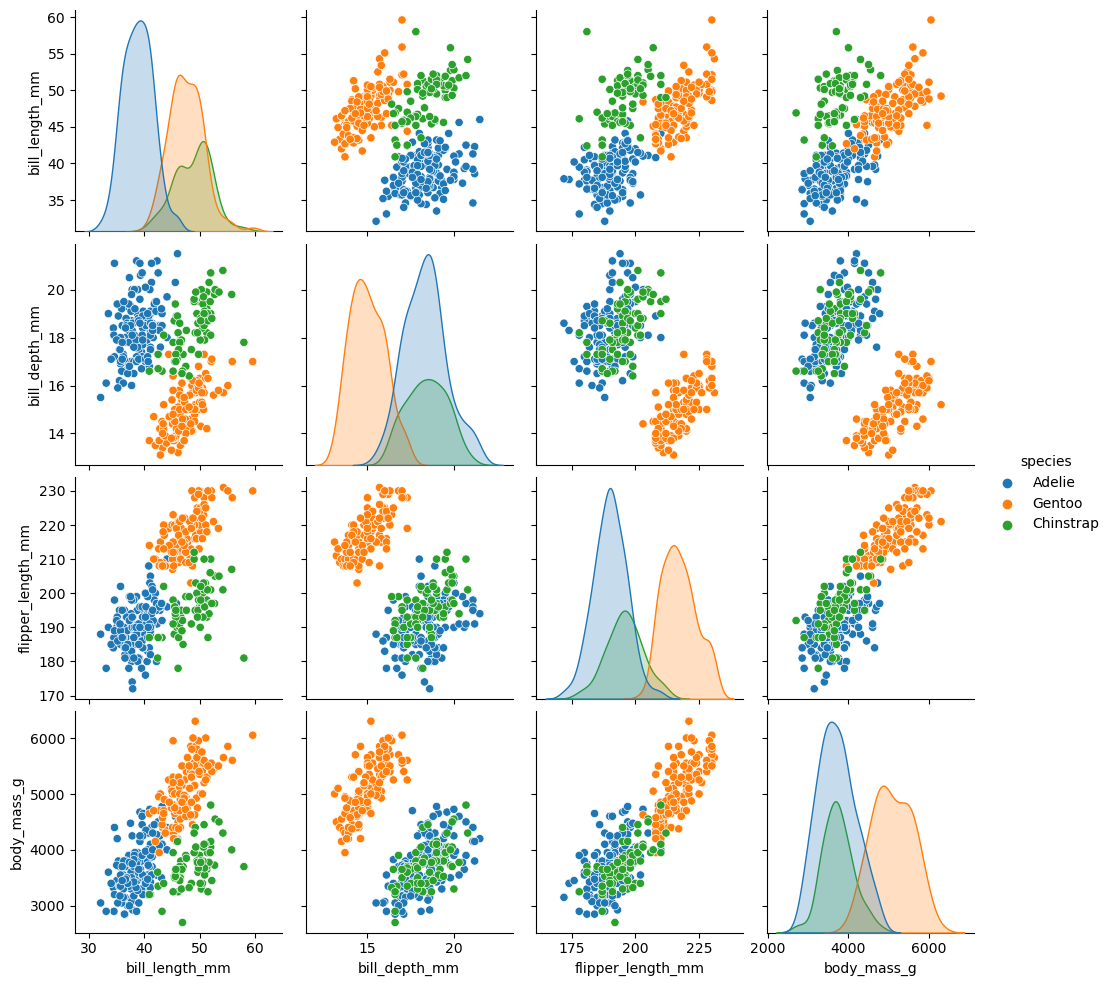

In [5]:
# Explore the features: bill length, bill depth, flipper length, body mass, and sex
sns.pairplot(df, hue='species')
plt.show()



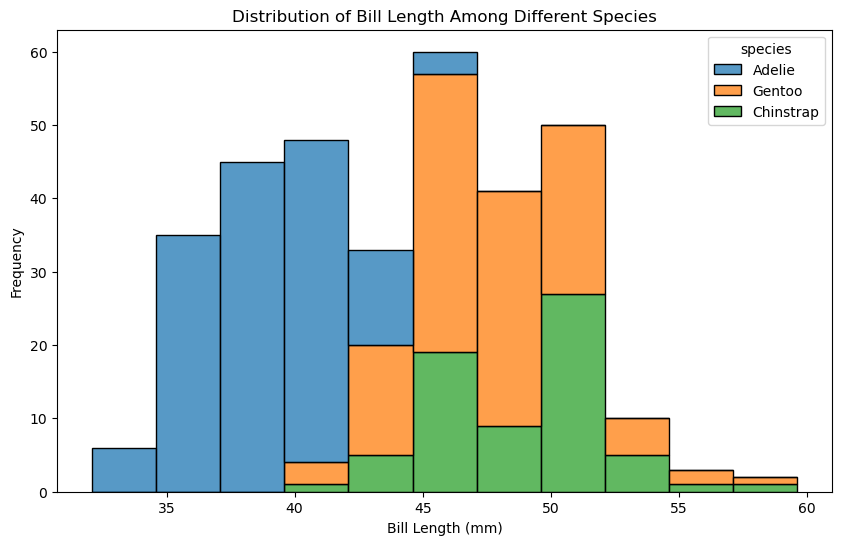

In [43]:
# Histogram: Displays the distribution of bill length among different species
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bill_length_mm', hue='species', multiple='stack')
plt.title('Distribution of Bill Length Among Different Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()





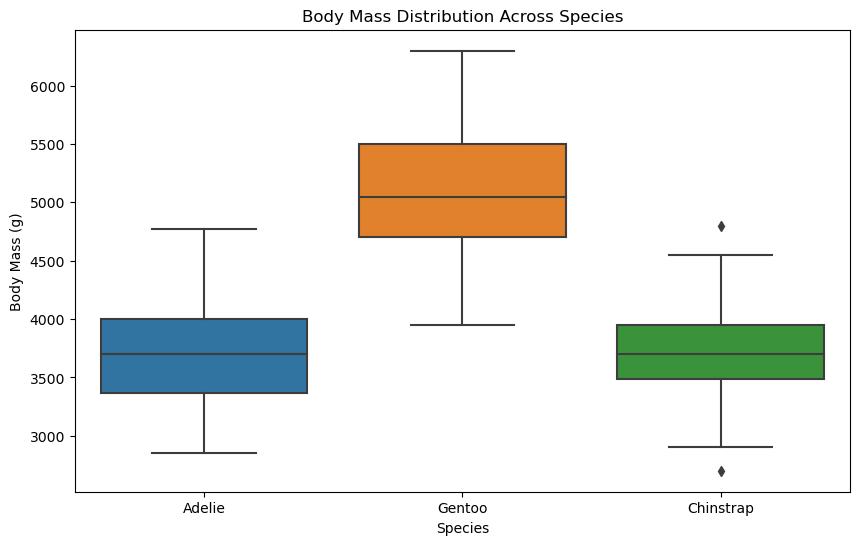

In [44]:
# Boxplot: Showcases the spread and outliers in body mass across species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Body Mass Distribution Across Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

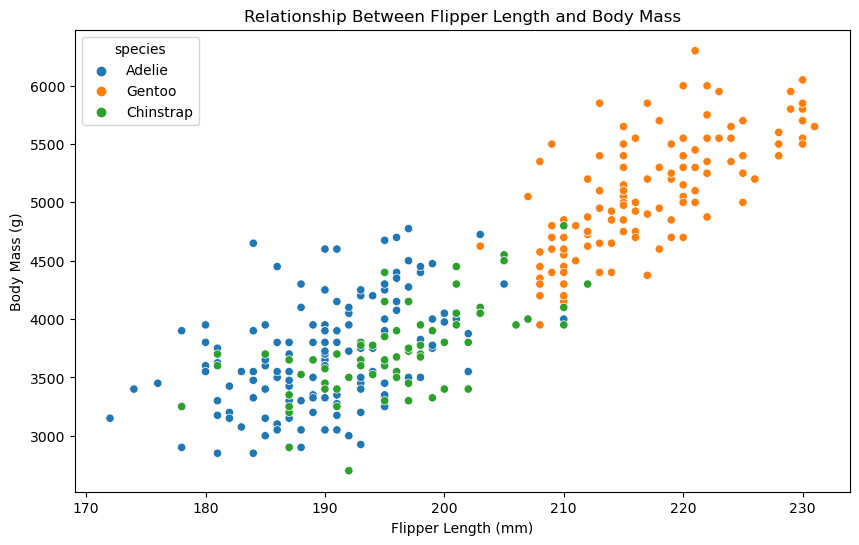

In [45]:
# Scatter Plot: Illustrates the relationship between flipper length and body mass
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Relationship Between Flipper Length and Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

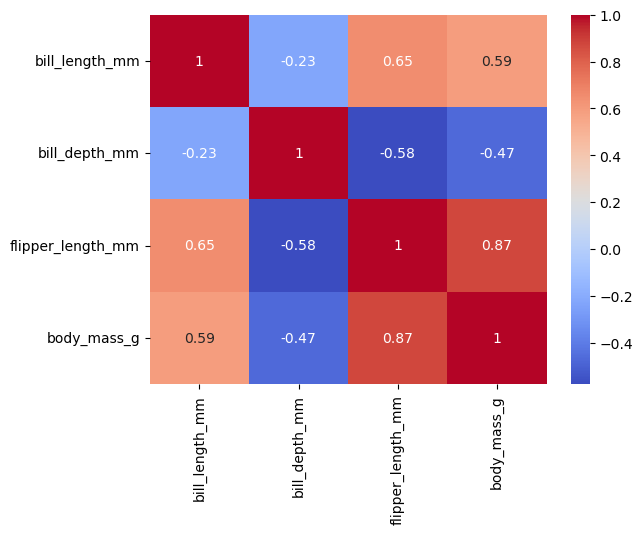

In [9]:

# Correlation matrix
numeric_df = df.select_dtypes(include=[float, int])
# Summarize any initial observations about the data distribution, correlations, and potential outliers
# Correlation matrix
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

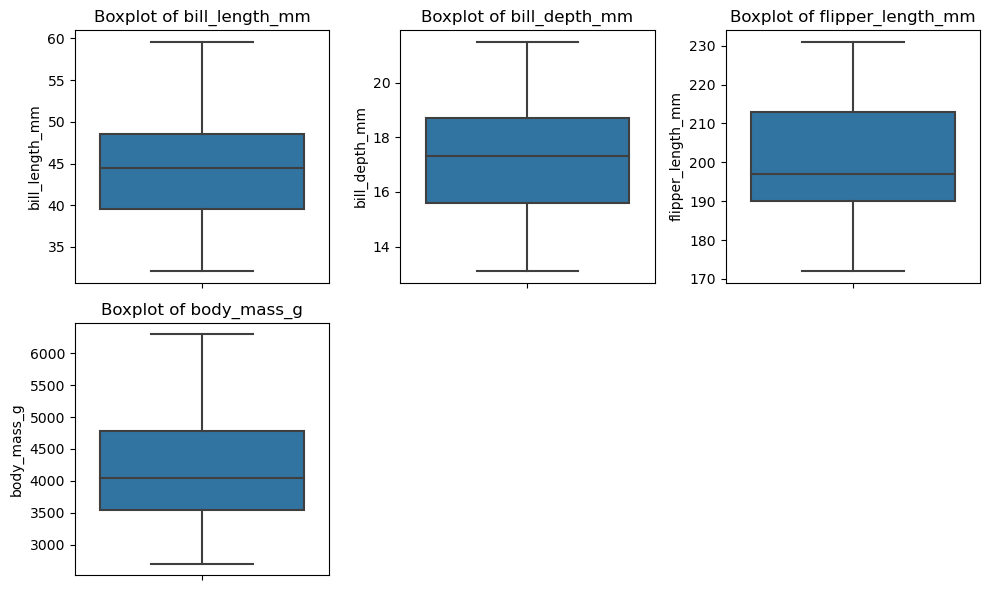

In [35]:
# Outliers detection using boxplots
# Filter numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


# 2.Data Preprocessing

In [10]:
# Handle any missing data appropriately
df = df.dropna()


In [15]:
# Encode categorical variables, such as species and sex, into numerical formats
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['island'] = label_encoder.fit_transform(df['island'])


In [16]:


# Now, apply Feature scaling or normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('species', axis=1))

# Creating the final preprocessed dataset
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['species']


In [18]:
X

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1.889392,-0.896042,0.780732,-1.426752,-0.568475,0.991031
1,1.889392,-0.822788,0.119584,-1.069474,-0.506286,-1.009050
2,1.889392,-0.676280,0.424729,-0.426373,-1.190361,-1.009050
3,1.889392,-1.335566,1.085877,-0.569284,-0.941606,-1.009050
4,1.889392,-0.859415,1.747026,-0.783651,-0.692852,0.991031
...,...,...,...,...,...,...
328,0.488128,2.162314,1.340165,0.431094,-0.257532,0.991031
329,0.488128,-0.090248,0.475587,0.073816,-1.003795,-1.009050
330,0.488128,1.026876,0.526444,-0.569284,-0.537380,0.991031
331,0.488128,1.246638,0.933305,0.645461,-0.133155,0.991031


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
328    1
329    1
330    1
331    1
332    1
Name: species, Length: 333, dtype: int64

# 3. Feature Selection and Importance

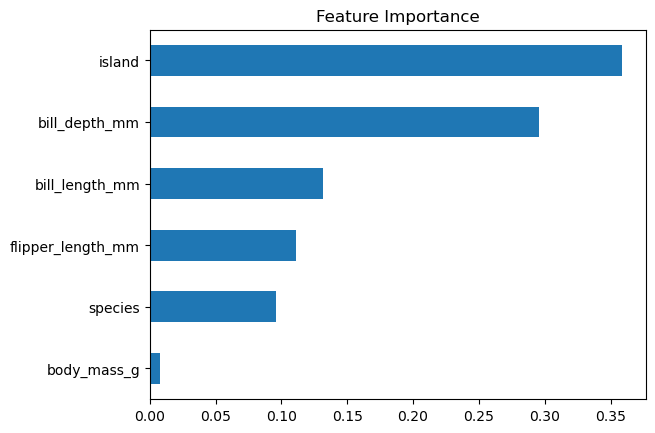

In [21]:
# Evaluate the importance of each feature in predicting the species using Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()


In [22]:
# Justify the selection of features used in the model
print("Selected Features based on importance:")
print(feature_importances)

Selected Features based on importance:
species              0.095536
island               0.358779
bill_length_mm       0.131421
bill_depth_mm        0.295515
flipper_length_mm    0.110957
body_mass_g          0.007791
dtype: float64


# 4. Model Building and Training


In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Implement the Random Forest classifier and tune its hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [25]:
# Evaluate it using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.96296296 0.96226415 0.98113208 0.94339623 1.        ]
Mean cross-validation score: 0.9699510831586304


# 5. Model Evaluation

In [26]:
# Assess the model's performance on the test set
y_pred = rf.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred)}")


Accuracy on test set: 0.9850746268656716


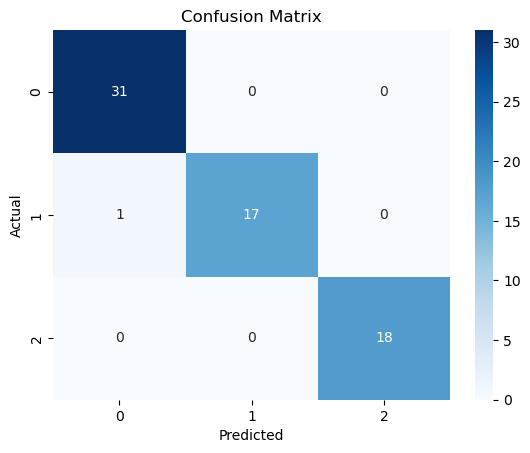

In [27]:
# Create and interpret a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67



# 6. Insights and Conclusion

In [29]:
# Interpret the results
print("The model shows a strong ability to classify penguin species, with high accuracy across multiple metrics.")

# Discuss any challenges faced during the analysis and how they were addressed
print("Challenges included handling missing data and determining the most impactful features.")

# Provide recommendations for improving model performance
print("For future improvement, exploring additional features and more advanced hyperparameter tuning could enhance model performance.")



The model shows a strong ability to classify penguin species, with high accuracy across multiple metrics.
Challenges included handling missing data and determining the most impactful features.
For future improvement, exploring additional features and more advanced hyperparameter tuning could enhance model performance.
